In [1]:
# Creat By GF 2023-07-15

# Python3_Project_用户复购周期分析.ipynb

In [2]:
import pandas as pd
#from datetime import *
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
# 导入计算好的数据。

import Python3_Project_RFM_Building_Data

df = Python3_Project_RFM_Building_Data.df

In [42]:
df

,time,fruit,name,kilogram,price,region,amount
0,2019-01-01,桃子,Jhon,55,7.0,华中,385.0
1,2019-01-02,梨,Xiaoming,69,5.8,华北,400.2
2,2019-01-03,橙子,Jimmy,79,6.8,华中,537.2
3,2019-01-04,哈密瓜,Michk,75,15.8,西北,1185.0
4,2019-01-05,苹果,Michk,99,8.9,华北,881.1
...,...,...,...,...,...,...,...
1091,2021-12-27,哈密瓜,Mike,69,15.8,西北,1090.2
1092,2021-12-28,橙子,Michk,75,6.8,华中,510.0
1093,2021-12-29,芭乐,Michk,77,4.9,华南,377.3
1094,2021-12-30,葡萄,Jhon,66,12.8,西北,844.8


In [43]:
# 用户复购周期分析。

In [44]:
# 复购周期是用户每两次购买之间的时间间隔：以xiaoming用户为例，前2次的复购周期分别是2天和9天。

In [45]:
df.sort_values(["name", "time"], ascending=[False, True]).head(15)

,time,fruit,name,kilogram,price,region,amount
1,2019-01-02,梨,Xiaoming,69,5.8,华北,400.2
14,2019-01-15,芭乐,Xiaoming,91,4.9,华南,445.9
21,2019-01-22,苹果,Xiaoming,87,8.9,华北,774.3
29,2019-01-30,芭乐,Xiaoming,70,4.9,华南,343.0
32,2019-02-02,葡萄,Xiaoming,92,12.8,西北,1177.6
42,2019-02-12,橙子,Xiaoming,61,6.8,华中,414.8
58,2019-02-28,芭乐,Xiaoming,85,4.9,华南,416.5
60,2019-03-02,芭乐,Xiaoming,56,4.9,华南,274.4
79,2019-03-21,苹果,Xiaoming,71,8.9,华北,631.9
80,2019-03-22,苹果,Xiaoming,93,8.9,华北,827.7


In [46]:
# 下面是求解每个用户复购周期的过程。

In [47]:
# 1. 每个用户的购买时间升序。

df_name_and_time = df[["name", "time"]].sort_values(["name", "time"], ascending=[False, True])

df_name_and_time

,name,time
1,Xiaoming,2019-01-02
14,Xiaoming,2019-01-15
21,Xiaoming,2019-01-22
29,Xiaoming,2019-01-30
32,Xiaoming,2019-02-02
...,...,...
1047,Jhon,2021-11-13
1066,Jhon,2021-12-02
1077,Jhon,2021-12-13
1086,Jhon,2021-12-22


In [48]:
# 2. 将时间移动一个单位。

df_shift_time = df_name_and_time.groupby("name").shift(1)._rename(columns={"time": "shift_time"})

df_shift_time

,shift_time
1,NaT
14,2019-01-02
21,2019-01-15
29,2019-01-22
32,2019-01-30
...,...
1047,2021-10-24
1066,2021-11-13
1077,2021-12-02
1086,2021-12-13


In [49]:
# 3. 合并后的差值。

df_concat = pd.concat([df_name_and_time, df_shift_time], axis=1)

df_concat

,name,time,shift_time
1,Xiaoming,2019-01-02,NaT
14,Xiaoming,2019-01-15,2019-01-02
21,Xiaoming,2019-01-22,2019-01-15
29,Xiaoming,2019-01-30,2019-01-22
32,Xiaoming,2019-02-02,2019-01-30
...,...,...,...
1047,Jhon,2021-11-13,2021-10-24
1066,Jhon,2021-12-02,2021-11-13
1077,Jhon,2021-12-13,2021-12-02
1086,Jhon,2021-12-22,2021-12-13


In [50]:
# 出现空值是每个用户的第一条记录之前是没有数据，直接删除了空值部分。

df_concat.dropna(inplace=True)

# 计算两次购买时间之间的差值 (复购周期)。

df_concat["time_delta"] = df_concat["time"] - df_concat["shift_time"]

df_concat

,name,time,shift_time,time_delta
14,Xiaoming,2019-01-15,2019-01-02,13 days
21,Xiaoming,2019-01-22,2019-01-15,7 days
29,Xiaoming,2019-01-30,2019-01-22,8 days
32,Xiaoming,2019-02-02,2019-01-30,3 days
42,Xiaoming,2019-02-12,2019-02-02,10 days
...,...,...,...,...
1047,Jhon,2021-11-13,2021-10-24,20 days
1066,Jhon,2021-12-02,2021-11-13,19 days
1077,Jhon,2021-12-13,2021-12-02,11 days
1086,Jhon,2021-12-22,2021-12-13,9 days


In [51]:
# 直接取出天数的数值部分。

df_concat["repurchase_cycle"] = df_concat["time_delta"].apply(lambda x: x.days)

df_concat

,name,time,shift_time,time_delta,repurchase_cycle
14,Xiaoming,2019-01-15,2019-01-02,13 days,13
21,Xiaoming,2019-01-22,2019-01-15,7 days,7
29,Xiaoming,2019-01-30,2019-01-22,8 days,8
32,Xiaoming,2019-02-02,2019-01-30,3 days,3
42,Xiaoming,2019-02-12,2019-02-02,10 days,10
...,...,...,...,...,...
1047,Jhon,2021-11-13,2021-10-24,20 days,20
1066,Jhon,2021-12-02,2021-11-13,19 days,19
1077,Jhon,2021-12-13,2021-12-02,11 days,11
1086,Jhon,2021-12-22,2021-12-13,9 days,9


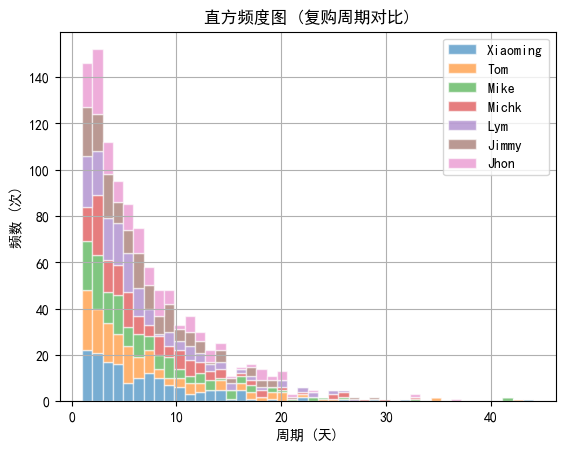

In [52]:
# 5. 复购周期对比

MaxRepurchaseCycle = df_concat["repurchase_cycle"].max()

ListName = df_concat["name"].drop_duplicates()

ListHisto = []

for Name in ListName:
    ListHisto.append(df_concat[df_concat.name == Name]["repurchase_cycle"])

# --------------------------------------------------

plt.rcParams['font.sans-serif'] = ['SimHei']

plt.hist(x=ListHisto,             # -> 绘图数据。
         bins=MaxRepurchaseCycle, # -> 指定直方图的条形数为20个。
         edgecolor='w',           # -> 指定直方图的边框色。
         #color=['c', 'r'],       # -> 指定直方图的填充色。
         label=ListName,          # -> 为直方图呈现图例。
         density=False,           # -> 是否将纵轴设置为密度 (即频率)。
         alpha=0.6,               # -> 透明度。
         rwidth=1,                # -> 直方图宽度百分比 (0 - 1)。
         stacked=True)            # -> 当有多个数据时，是否需要将直方图呈堆叠摆放 (默认水平摆放)。

plt.title("直方频度图 (复购周期对比)")
plt.xlabel("周期 (天)")
plt.ylabel("频数 (次)")
plt.legend() # -> 显示图例。
plt.grid(True)
    
plt.show()

In [57]:
# 需要注意的是，直方图和我们常见的柱状图可不一样。
# 直方图用于显示定量数据的分布；而柱状图对比定类数据。
# 在绘制时，直方图是按照数值大小进行分组排列，前后顺序不可变更。
# 柱状图则是对分类对象进行分组，而不是根据具体数值进行分组，分组顺序可以调整。

In [54]:
# 查看每个用户的整体复购周期之和与平均复购周期。

df_concat.groupby("name")["repurchase_cycle"].agg(["count", "mean"])

,count,mean
name,,
Jhon,156,7.012821
Jimmy,157,6.834395
Lym,159,6.735849
Michk,152,7.184211
Mike,150,7.220000
Tom,155,7.000000
Xiaoming,160,6.800000


In [55]:
# 得到一个结论：有的用户整体的复购周期是比较长的，长期来看是忠诚的用户。
# 而且从平均复购周期来看，相对较低，说明在短时间内复购活跃。

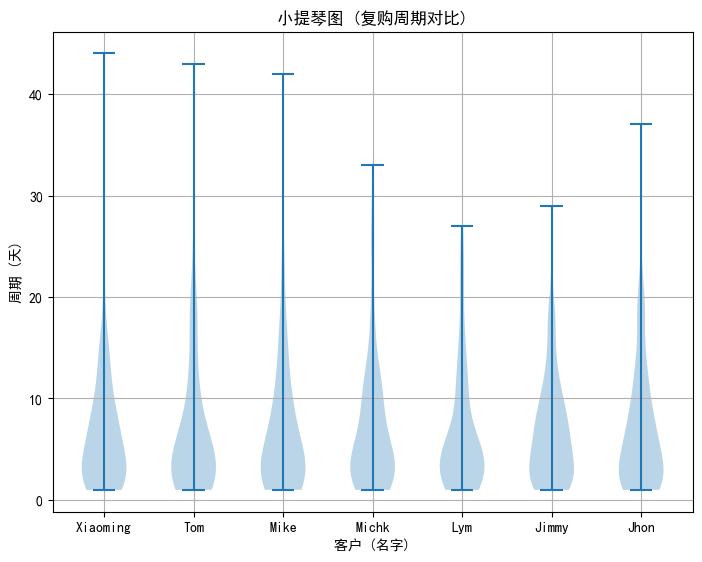

In [56]:
# 小提琴图 (Violin Plot) 是用来展示多组数据的分布状态以及概率密度。
# 这种图表结合了箱形图和密度图的特征，主要用来显示数据的分布形状。
# 跟箱形图类似，但是在密度层面展示更好。在数据量非常大不方便一个一个展示的时候小提琴图特别适用。

ListName = df_concat["name"].drop_duplicates()

ListViolin = []

for Name in ListName:
    ListViolin.append(df_concat[df_concat.name == Name]["repurchase_cycle"])

# --------------------------------------------------
    
plt.rcParams['font.sans-serif'] = ['SimHei']

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.violinplot(ListViolin)

ax.set_xticks([1,2,3,4,5,6,7]) # -> 使用 axis.set_xticks 固定刻度位置 (新添加内容)。
ax.set_xticklabels(ListName) # -> 将客户名字作为 X 轴标签。

plt.title("小提琴图 (复购周期对比)")
plt.xlabel("客户 (名字)")
plt.ylabel("周期 (天)")
plt.grid(True)

plt.show()